# #1 - Exploratory Data Analysis

Beberapa hal yang dilakukan

- Ekstraksi data : Melakukan load data dan melihat kondisi data.
- Cleaning : Membersihkan data dari missing value.
- Plotting : Membuat beberapa chart yang mungkin dapat membantu menemukan suatu korealasi atau insight tersembunyi dari data.
- Assumptions : Memformulasikan beberapa hipotesis berdasarkan chart yang didapat.

In [1]:
# Import library yang diperlukan
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib
import numpy as np
from matplotlib import pyplot as plt
matplotlib.style.use('ggplot')

Terdapat dua set data, set training dan set testing. Data training digunakan untuk membangun model prediksi, sedangkan data testing untuk keperluan scoring pada sistem evaluasi Kaggle.

In [2]:
# Load training data sebagai data frame
data = pd.read_csv('Data/train.csv', header = 0)

In [3]:
# Melihat sekilas bentuk data
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Kolom Survived merupakan variable target prediksi. Angka 1 menunjukan selamat, dan 0 tidak selamat.
Terdapat beberapa variable prediktor, yaitu:
- PClass: Kelas penumpang. (Kategorik)
- Nama: Nama penumpang.
- Sex: Jenis kelamin. (Kategorik)
- Age: Usia penumpang. (Numerik)
- SibSp: Jumlah saudara kandung dan pasangan dari penumpang tsb. (Numerik)
- Parch: Jumlah orang tua dan anak yang dibawa oleh penumpang. (Numerik)
- Nomor tiket
- Harga tiket (Numerik)
- Embarkation: Embarkasih penumpang. (Kategorik)

In [4]:
# Mendeskrisikan statistik data untuk variabel numerik
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,NaN,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,NaN,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,NaN,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Pada variabel Age terdata 177 nilai yang hilang.
Dilakukan clearning dengan mengisis missing value pada Age dengan nilai median Age. Median tidak terpengaruh outlier seperti mearn.

In [5]:
data['Age'].fillna(data['Age'].median(), inplace = True)

# Cek kembali statistiknya
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Selanjutnya dilakukan plotting chart.
Pertama melakukan visualisasi data penumpang yang selamat berdasarkan jenis kelamin

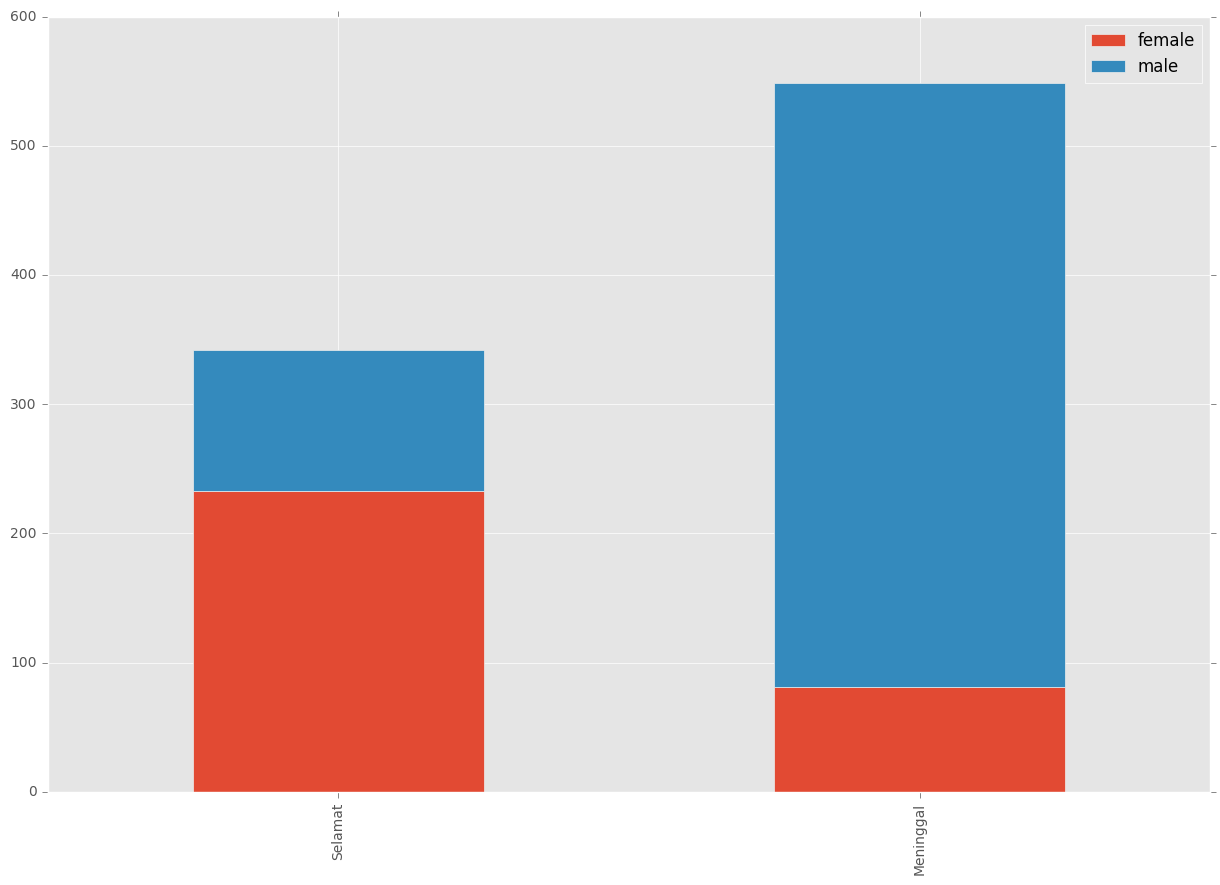

In [6]:
selamat_sex = data[data['Survived'] == 1]["Sex"].value_counts()
meninggal_sex = data[data['Survived'] == 0]['Sex'].value_counts()
df = pd.DataFrame([selamat_sex, meninggal_sex])
df.index = ['Selamat', 'Meninggal']
df.plot(kind='bar', stacked=True, figsize=(15, 10))

Terlihat bahwa wanita lebih cenderung selamat. Variabel sex bisa saja menjadi variabel penting pada prediksi

Selanjutnya visualisasi survival berdasarkan Age

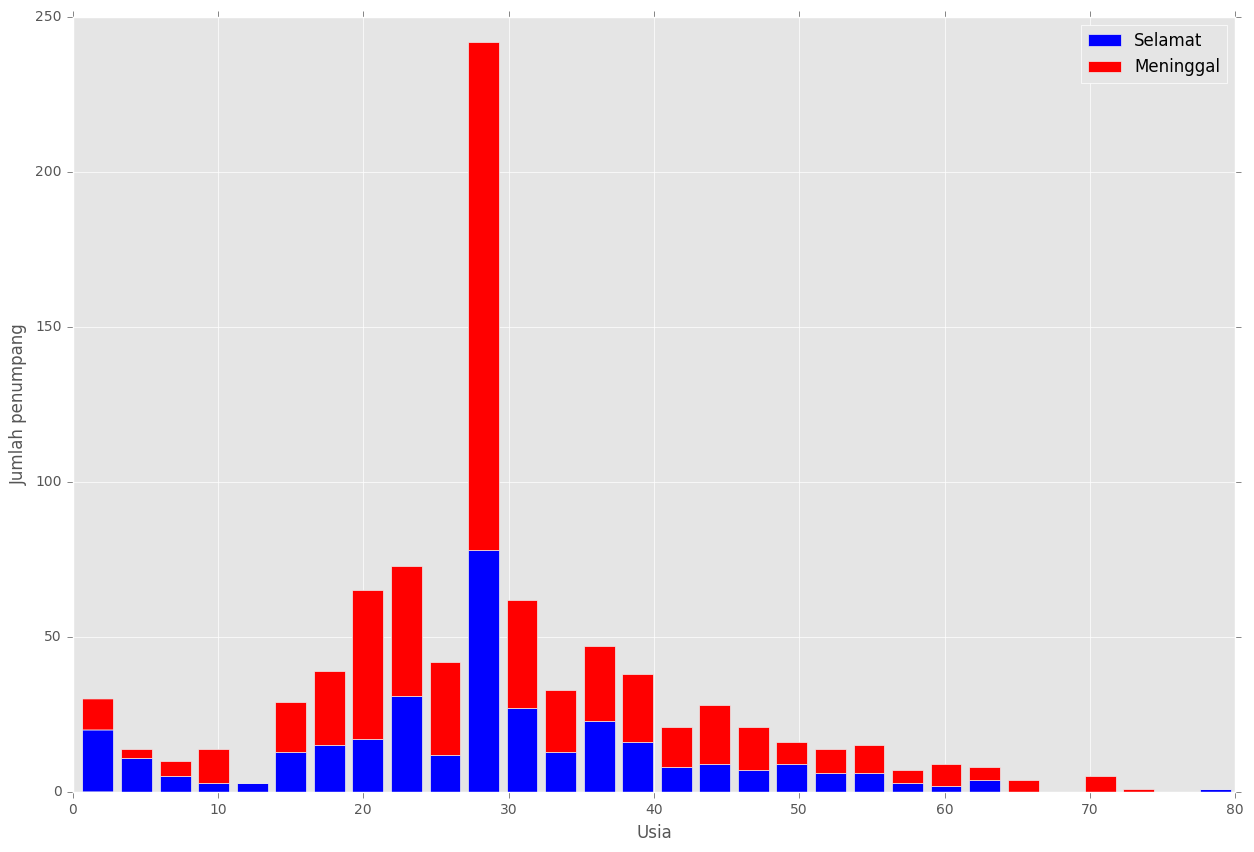

In [7]:
fgr = plt.figure(figsize=(15, 10))
plt.hist([data[data['Survived']==1]['Age'],
          data[data['Survived']==0]['Age']],
         stacked = True, color = ['b', 'r'], bins = 30,
         label = ['Selamat', 'Meninggal'])
plt.xlabel('Usia')
plt.ylabel('Jumlah penumpang')
plt.legend()

Terlihat bahwa anak-anak (< 10 tahun) lebih cenderung selamat. Dari dua chart tersebut bisa dikatakan bahwa anak-anak dan wanita lebih diutamakan untuk diselamatkan.

Selanjutnya melihat korelasi antara harga tiket dengan selamatnya seseorang.

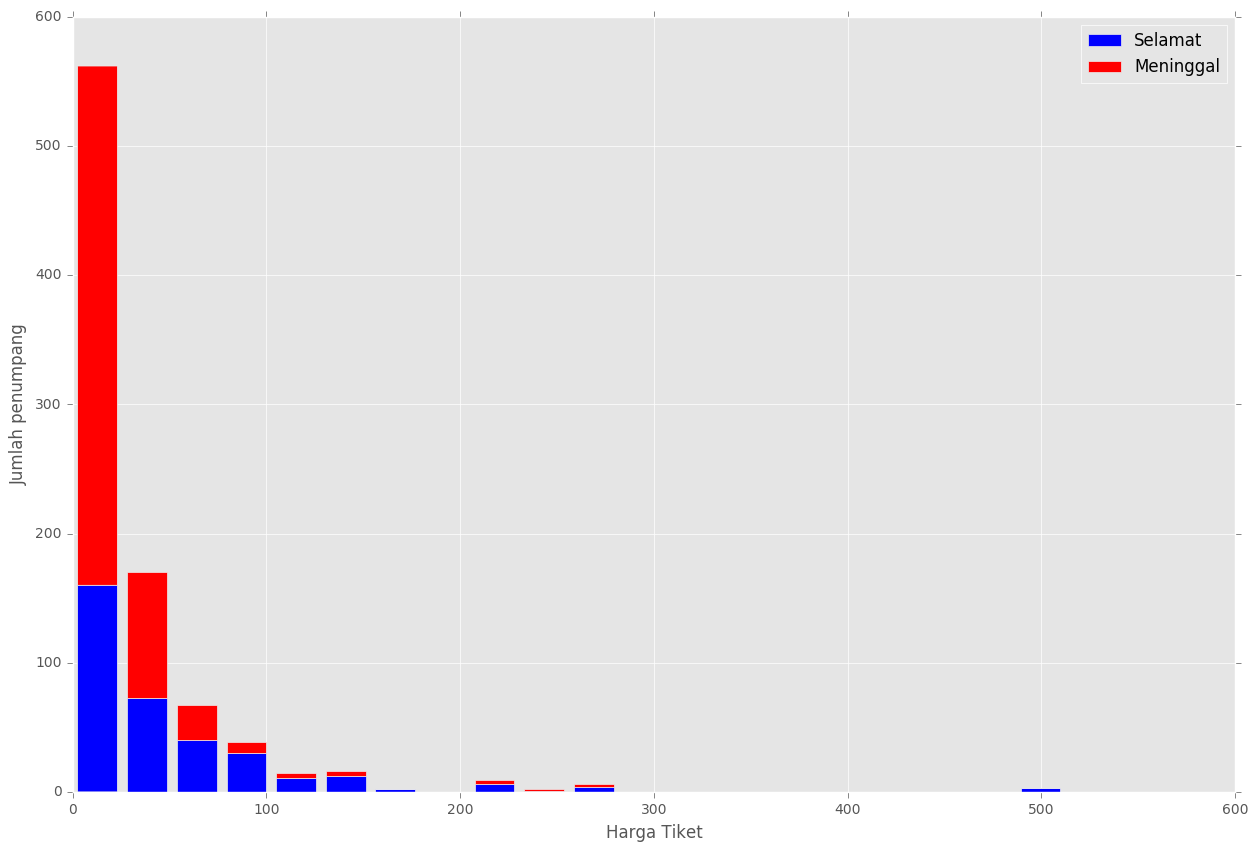

In [8]:
fgr = plt.figure(figsize = (15, 10))
plt.hist([data[data['Survived']==1]['Fare'],
          data[data['Survived']==0]['Fare']],
         stacked = True, color = ['b', 'r'], bins = 20,
         label = ['Selamat', 'Meninggal'])
plt.xlabel('Harga Tiket')
plt.ylabel('Jumlah penumpang')
plt.legend()

Bisa dilihat bahwa penumpang dengan harga tiket yang lebih mahal (status sosial lebih tingg) lebih cenderung selamat.

Sekarang menggabungkan Age, Fare, dan Survival pada satu chart.

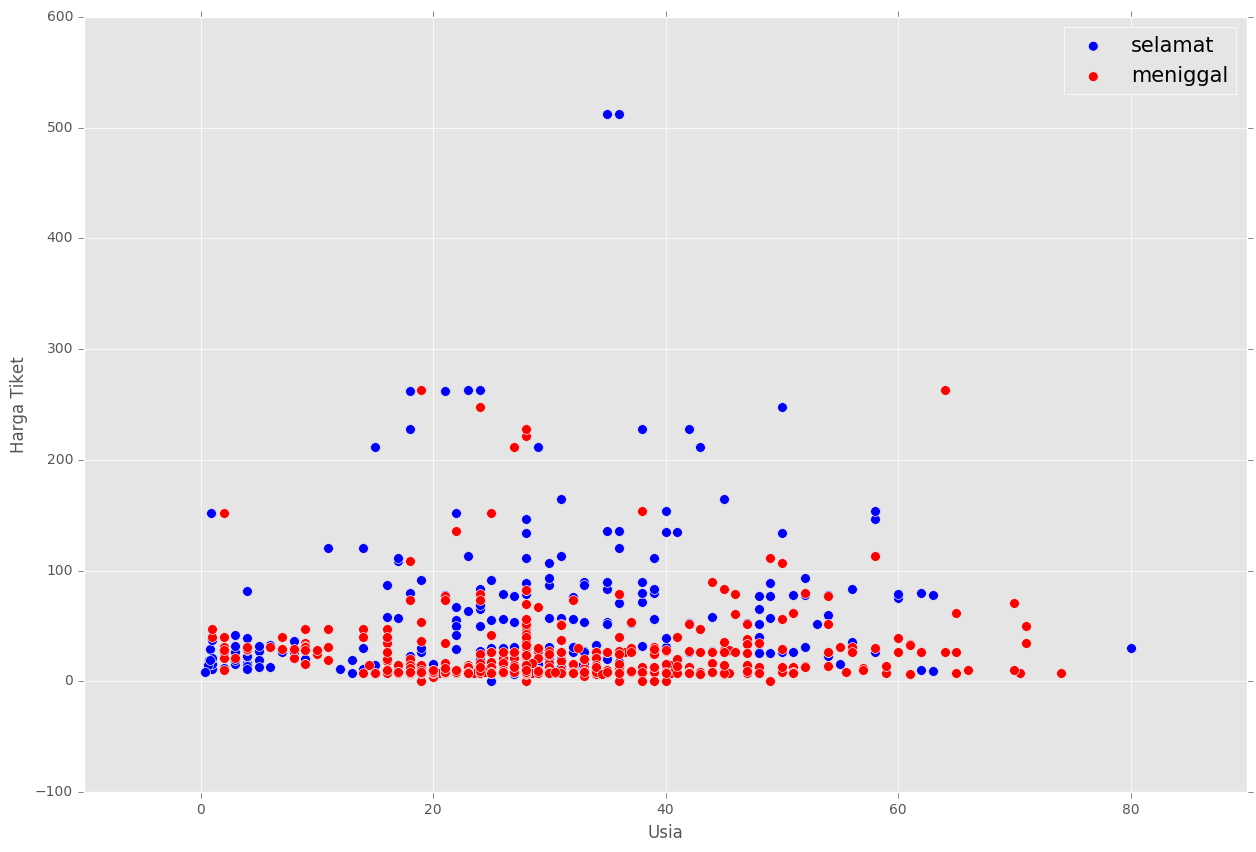

In [9]:
plt.figure(figsize=(15,10))
ax = plt.subplot()
ax.scatter(data[data['Survived']==1]['Age'],
           data[data['Survived']==1]['Fare'],c='blue',s=50)
ax.scatter(data[data['Survived']==0]['Age'],
           data[data['Survived']==0]['Fare'],c='red',s=50)
ax.set_xlabel('Usia')
ax.set_ylabel('Harga Tiket')
ax.legend(('selamat','meniggal'),scatterpoints=1,
          loc='upper right',fontsize=15,)

Terdapat cluster mencolok dari penumpang-penumpang yang meniggal. Orang-orang tersebut adalah mereka yang berumur 15 - 50 dan memiliki harga tiket yang paling rendah.

Harga tiket ada korelasinya dengan kelas penumpang (PClass), seperti ditunjukkan chart berikut.

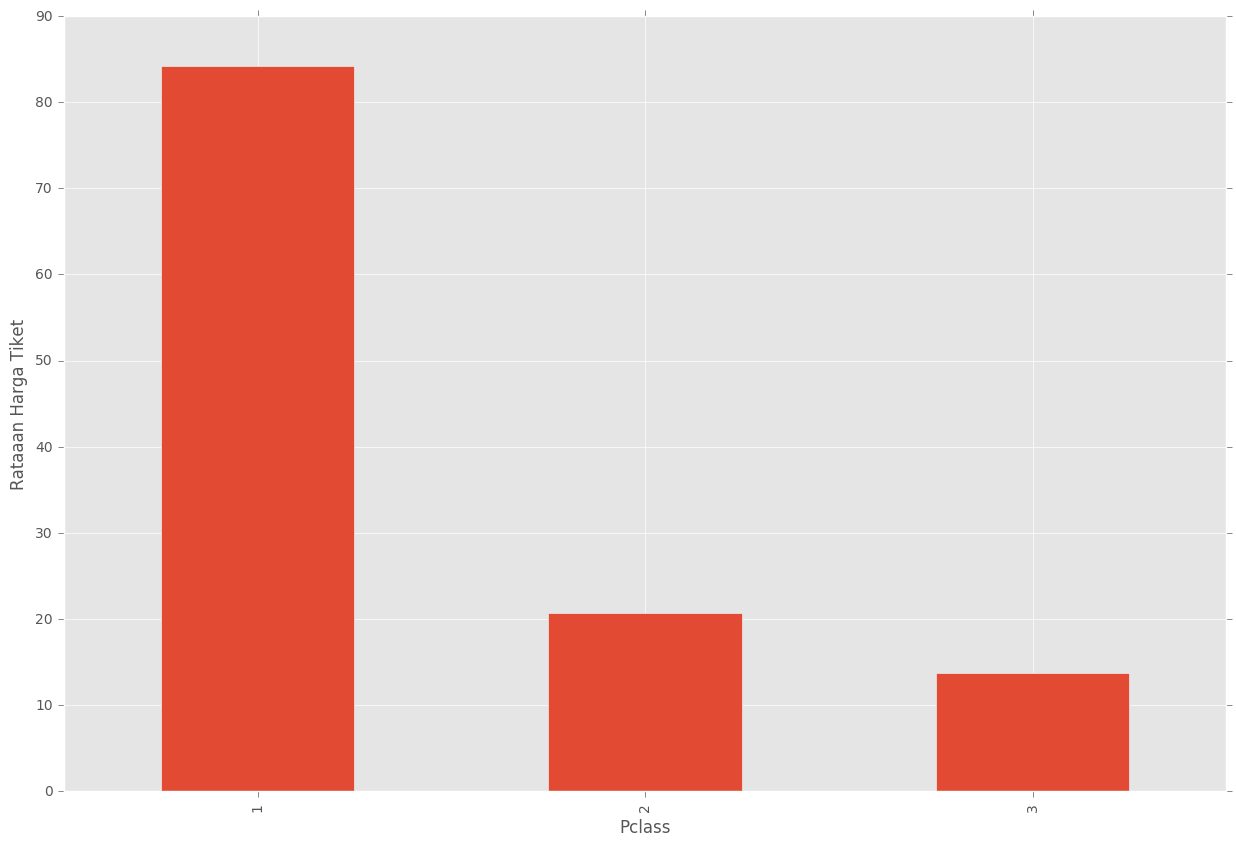

In [10]:
a = plt.subplot()
a.set_ylabel('Rataaan Harga Tiket')
data.groupby('Pclass').mean()['Fare'].plot(kind='bar',
                                          figsize=(15,10),
                                          ax = a)

Selanjutnya melihat efek Embarkation terhadap tingkat keselamatan

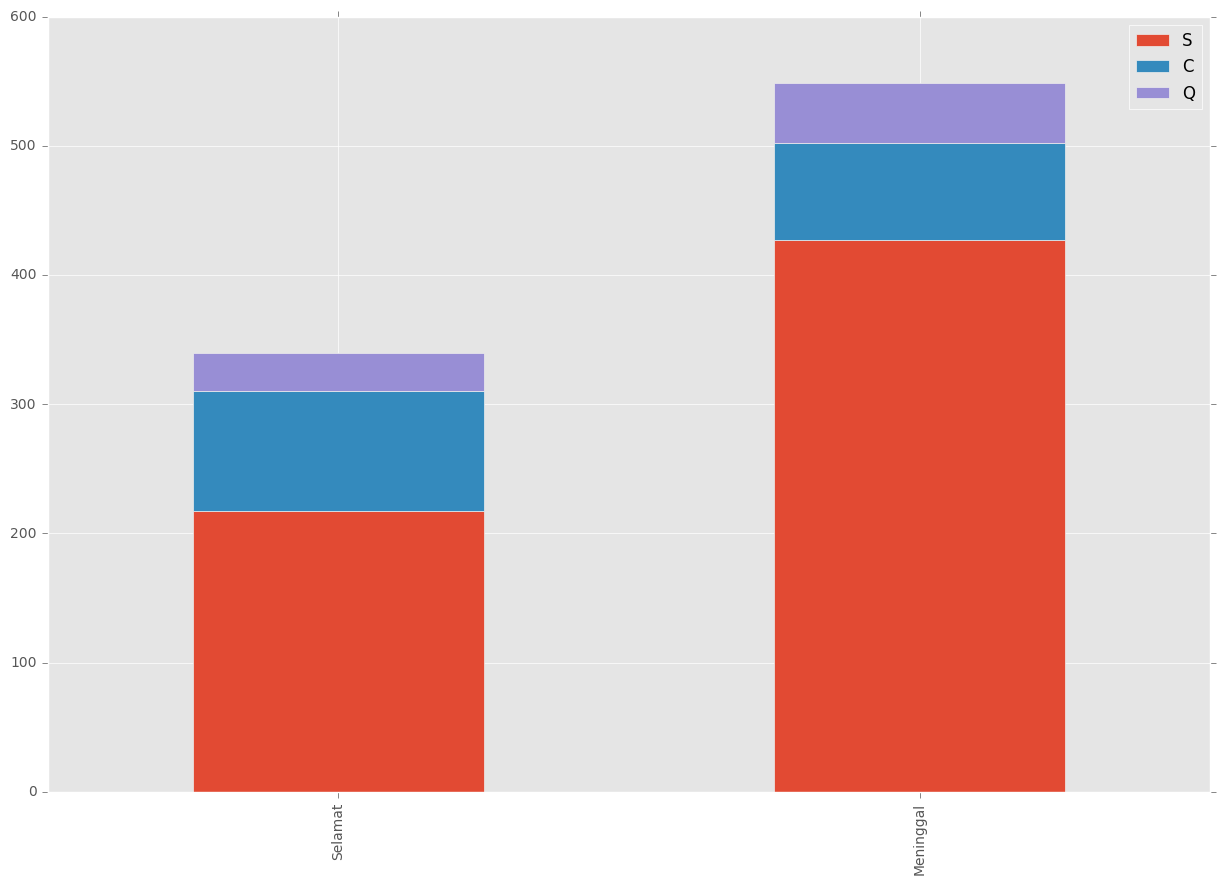

In [11]:
selamat_embrk = data[data['Survived'] == 1]['Embarked'].value_counts()
meninggal_embrk = data[data['Survived'] == 0]['Embarked'].value_counts()
df = pd.DataFrame([selamat_embrk, meninggal_embrk])
df.index = ['Selamat', 'Meninggal']
df.plot(kind='bar', stacked=True, figsize=(15,10))

Tidak ada korelasi tertentu.

# #2 - Feature Engineering

Pada tahap ini dilakukan persiapan fitur dan ekstraksi fitur baru untuk pembangunan model prediksi.

### Loading data
Di sini dilakukan penggabungan data dari train set dan test set. Hal ini dilakukan untuk 'menangkap' fitur-fitur yang muncul pada test set namun tidak muncul pada train set. Selain itu, mempermudah pula data praprocess kedua set data tersebut.

In [12]:
def combine_data():
    # baca train data
    train = pd.read_csv('Data/train.csv')
    
    # baca test data
    test = pd.read_csv('Data/test.csv')

    # ekstrak dan hapus target variable Survive dari train set 
    target = train.Survived
    train.drop('Survived',1,inplace=True)
    

    # penggabungan train dan test set
    combined = train.append(test)
    combined.reset_index(inplace=True)
    combined.drop('index',inplace=True,axis=1)
    
    return combined

combined = combine_data()

In [13]:
combined.shape

(1309, 11)

Dari hasil penggabungan terdapat 1309 observasi dan 11 fitur.

In [14]:
combined.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
combined.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,2.000000,NaN,0.000000,0.000000,NaN
50%,655.000000,3.000000,NaN,0.000000,0.000000,NaN
75%,982.000000,3.000000,NaN,1.000000,0.000000,NaN
max,1309.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [16]:
1309 - 1046

263

### Processing the names
Satu hal yang bisa ditarik informasi dari nama adalah gelar (Title). Akan dilakukan ekstraksi fitur Title dari nama.

In [17]:
# Fungsi untuk mengambil Title dari Names.
import re
def get_title(name):
    # Pencarian title menggunakan regular expression.
    # Titles selalu terdiri dari Huruf kapital di awal,
    # diikuti huruf kecil, dan diakhiri tanda titik
    title_search = re.search(' ([A-Za-z]+)\.', name)
    
    if title_search:
        return title_search.group(1)
    return ""

# Melihat semua title dan seberapa masing2 tersebut muncul.
titles = combined["Name"].apply(get_title)
print pd.value_counts(titles)

Mr          757
Miss        260
Mrs         197
Master       61
Dr            8
Rev           8
Col           4
Major         2
Mlle          2
Ms            2
Don           1
Capt          1
Lady          1
Sir           1
Countess      1
Jonkheer      1
Dona          1
Mme           1
Name: Name, dtype: int64


In [18]:
# Memetakan setiap title ke suatu integer.
title_mapping = {"Capt":       "Officer",
                 "Col":        "Officer",
                 "Major":      "Officer",
                 "Jonkheer":   "Royalty",
                 "Don":        "Royalty",
                 "Sir" :       "Royalty",
                 "Dr":         "Officer",
                 "Rev":        "Officer",
                 "Countess":"Royalty",
                 "Dona":       "Royalty",
                 "Mme":        "Mrs",
                 "Mlle":       "Miss",
                 "Ms":         "Mrs",
                 "Mr" :        "Mr",
                 "Mrs" :       "Mrs",
                 "Miss" :      "Miss",
                 "Master" :    "Master",
                 "Lady" :      "Royalty"
                }

for k,v in title_mapping.items():
    titles[titles == k] = v

# Add in the title column.
combined["Title"] = titles
combined.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


Selanjutnya, dilakukan ekstraksi fitur baru yang dapat merepresentasikan info lain dari Name, yaitu panjang nama. Semakin panjang, biasanya semakin terhormat orang tersebut.

In [19]:
combined['NameLength'] = combined['Name'].apply(lambda x: len(x))

In [20]:
# Variable Name sudah tidak diperlukan lagi.
combined.drop('Name', axis=1, inplace=True)

### Processing the ages
Terlihat bahwa pada Age terdapat 263 missing value. Mengisi data tersebut dengan mean atau median tidaklah tepat, karena distribusi usia pasti berbeda untuk setiap kategori.

Seperti yang dapat ditunjukkan berikut.

In [21]:
grouped = combined.groupby(['Sex', 'Pclass', 'Title'])
grouped.median()

PassengerId   Age  SibSp  Parch      Fare  NameLength
Sex    Pclass Title                                                         
female 1      Miss           529.5  30.0    0.0    0.0   99.9625        25.0
              Mrs            853.5  45.0    1.0    0.0   78.1125        46.0
              Officer        797.0  49.0    0.0    0.0   25.9292        27.0
              Royalty        760.0  39.0    0.0    0.0   86.5000        56.0
       2      Miss           606.5  20.0    0.0    0.0   20.2500        24.5
              Mrs            533.0  30.0    1.0    0.0   26.0000        40.5
       3      Miss           603.5  18.0    0.0    0.0    8.0500        26.0
              Mrs            668.5  31.0    1.0    1.0   15.5000        41.0
male   1      Master         803.0   6.0    1.0    2.0  134.5000        30.0
              Mr             634.0  41.5    0.0    0.0   47.1000        25.0
              Officer        678.0  52.0    0.0    0.0   37.5500        26.0
              Royalty        600.0  40.0    0.0    0.0   27.7208        31.0
       2      Master         550.0   2.0    1.0    1.0   26.0000        29.0
              Mr             723.5  30.0    0.0    0.0   13.0000        25.0
              Officer        513.0  41.5    0.0    0.0   13.0000        24.0
       3      Master         789.0   6.0    3.0    1.0   22.3583        28.0
              Mr             640.5  26.0    0.0    0.0    7.8958        21.0

Dari tabel di atas dapat dilihat bahwa nilai median berbeda dari tiap grup. Misal wanita dengan kelas penumpang 2 dan memiliki gelas Miss maka median dari usia pada kategori tersebut adalah 20 tahun.

Dengan demikian praprocess age harus berdasarkan kriteria tersebut.

In [22]:
def process_age():
    
    global combined
    
    # aSebuah fungsi yang mengisi missing value pada Age
    
    def isiAge(row):
        if row['Sex']=='female' and row['Pclass'] == 1:
            if row['Title'] == 'Miss':
                return 30
            elif row['Title'] == 'Mrs':
                return 45
            elif row['Title'] == 'Officer':
                return 49
            elif row['Title'] == 'Royalty':
                return 39

        elif row['Sex']=='female' and row['Pclass'] == 2:
            if row['Title'] == 'Miss':
                return 20
            elif row['Title'] == 'Mrs':
                return 30

        elif row['Sex']=='female' and row['Pclass'] == 3:
            if row['Title'] == 'Miss':
                return 18
            elif row['Title'] == 'Mrs':
                return 31

        elif row['Sex']=='male' and row['Pclass'] == 1:
            if row['Title'] == 'Master':
                return 6
            elif row['Title'] == 'Mr':
                return 41.5
            elif row['Title'] == 'Officer':
                return 52
            elif row['Title'] == 'Royalty':
                return 40

        elif row['Sex']=='male' and row['Pclass'] == 2:
            if row['Title'] == 'Master':
                return 2
            elif row['Title'] == 'Mr':
                return 30
            elif row['Title'] == 'Officer':
                return 41.5

        elif row['Sex']=='male' and row['Pclass'] == 3:
            if row['Title'] == 'Master':
                return 6
            elif row['Title'] == 'Mr':
                return 26
    
    combined.Age = combined.apply(lambda r : isiAge(r) if np.isnan(r['Age']) else r['Age'], axis=1)

process_age()

In [23]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
Age            1309 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Title          1309 non-null object
NameLength     1309 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


Setelah praprocess Age, dilakukan encoding terhadap Title agar dikenali oleh machine learning. Encoding dilakukan dengan dummy encoding.

In [24]:
# encoding dalam dummy variable
titles_dummies = pd.get_dummies(combined['Title'],prefix='Title')
combined = pd.concat([combined,titles_dummies],axis=1)

# menghapus variabel title
combined.drop('Title',axis=1,inplace=True)

In [25]:
combined.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,NameLength,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty
0,1,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,23,0.0,0.0,1.0,0.0,0.0,0.0
1,2,1,female,38.0,1,0,PC 17599,71.2833,C85,C,51,0.0,0.0,0.0,1.0,0.0,0.0
2,3,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,22,0.0,1.0,0.0,0.0,0.0,0.0
3,4,1,female,35.0,1,0,113803,53.1000,C123,S,44,0.0,0.0,0.0,1.0,0.0,0.0
4,5,3,male,35.0,0,0,373450,8.0500,NaN,S,24,0.0,0.0,1.0,0.0,0.0,0.0


Fitur Title digantikan dengan fitur biner.

### Processing Fare

In [26]:
# terdapat satu missing value pada Fare, diisi dengan nilai mean
combined['Fare'].fillna(combined['Fare'].mean(), inplace=True)

combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 17 columns):
PassengerId      1309 non-null int64
Pclass           1309 non-null int64
Sex              1309 non-null object
Age              1309 non-null float64
SibSp            1309 non-null int64
Parch            1309 non-null int64
Ticket           1309 non-null object
Fare             1309 non-null float64
Cabin            295 non-null object
Embarked         1307 non-null object
NameLength       1309 non-null int64
Title_Master     1309 non-null float64
Title_Miss       1309 non-null float64
Title_Mr         1309 non-null float64
Title_Mrs        1309 non-null float64
Title_Officer    1309 non-null float64
Title_Royalty    1309 non-null float64
dtypes: float64(8), int64(5), object(4)
memory usage: 173.9+ KB


### Processing Embarked

In [27]:
# ada 2 missing value pada embarked, diisi dengan nilai paling sering muncul
for i in ["S", "C", "Q"]:
    print i, ' ', len(combined[combined["Embarked"] == i])

S   914
C   270
Q   123


In [28]:
# S yang paling sering muncul
combined.Embarked.fillna('S', inplace=True)

# Dummy encoding terhadap embarked
embarked_dummies = pd.get_dummies(combined['Embarked'], prefix='Embarked')
combined = pd.concat([combined, embarked_dummies], axis=1)
combined.drop('Embarked', axis=1, inplace=True)

In [29]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 19 columns):
PassengerId      1309 non-null int64
Pclass           1309 non-null int64
Sex              1309 non-null object
Age              1309 non-null float64
SibSp            1309 non-null int64
Parch            1309 non-null int64
Ticket           1309 non-null object
Fare             1309 non-null float64
Cabin            295 non-null object
NameLength       1309 non-null int64
Title_Master     1309 non-null float64
Title_Miss       1309 non-null float64
Title_Mr         1309 non-null float64
Title_Mrs        1309 non-null float64
Title_Officer    1309 non-null float64
Title_Royalty    1309 non-null float64
Embarked_C       1309 non-null float64
Embarked_Q       1309 non-null float64
Embarked_S       1309 non-null float64
dtypes: float64(11), int64(5), object(3)
memory usage: 194.4+ KB


### Processing Cabin

Terdapat banyak missing value pada cabin. Sehingga tidak terlalu banyak informasi yang bisa didapat. Cabin tidak diperlukan.

In [30]:
combined.drop('Cabin', axis=1, inplace=True)

### Processing Sex

Hanya melakukan recode, Male = 0, Female = 1.

In [31]:
combined['Sex'] = combined['Sex'].map({'male': 0,
                                      'female': 1})

### Processing Ticket

In [32]:
combined.drop('Ticket', axis=1, inplace=True)

### Processing Family

Disini diekstrak fitur baru yaitu FamilySize, yang merupakan informasi jumlah keluarga (Parch + SibSp)

In [33]:
combined['FamilySize'] = combined['Parch'] + combined['SibSp'] + 1

Pada explorasi data pada tahap awal, terdapat temuan bahwa Age dan Sex merupakan variable yang mungkin paling berpengaruh menentukan Survival penumpang. Di sini akan mencoba melakukan clustering berdasarkan kedua variable tersebut.

Untuk menentukan jumlah cluster yang tepat, akan dilakukan Silhouette Methode. Semakin tinggi nilai koefisien siluet (1), maka merupakan jumlah cluster terbaik.

('For n_clusters =', 2, 'The average silhouette_score is :', 0.59975930701808167)


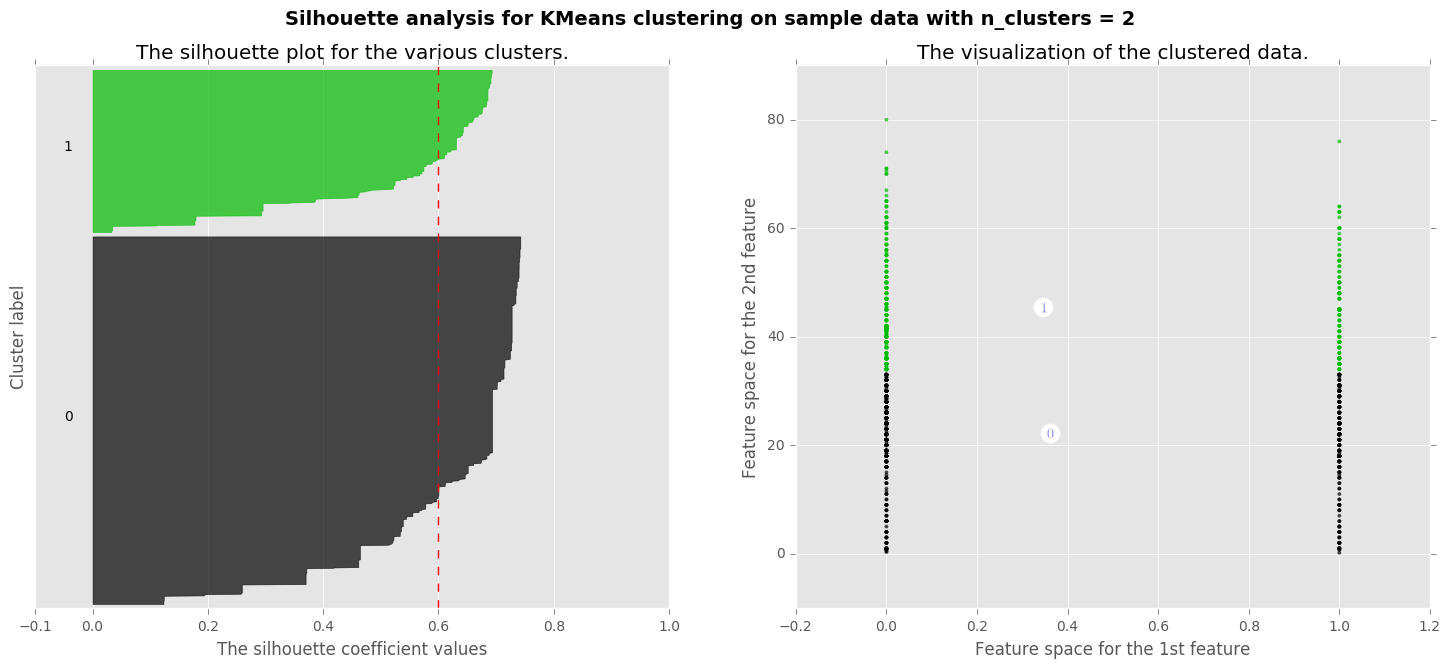

('For n_clusters =', 3, 'The average silhouette_score is :', 0.54380436904464613)


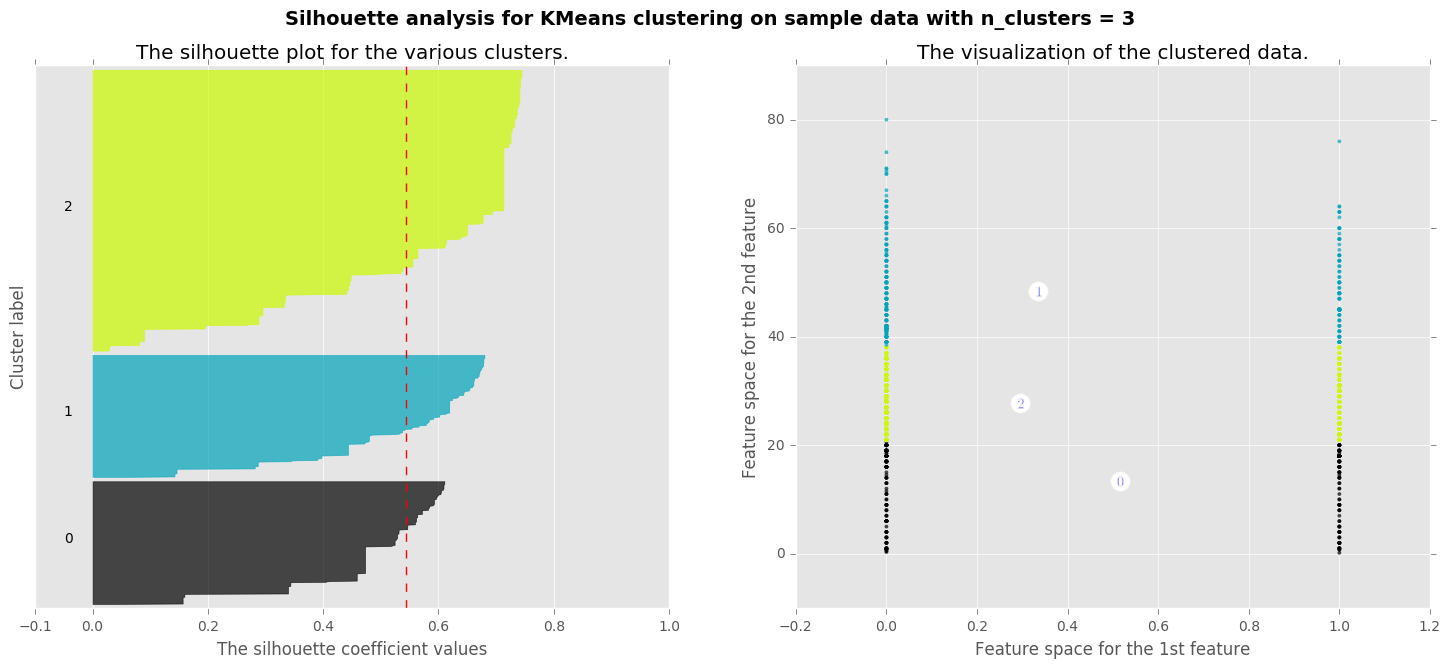

('For n_clusters =', 4, 'The average silhouette_score is :', 0.56082849237234134)


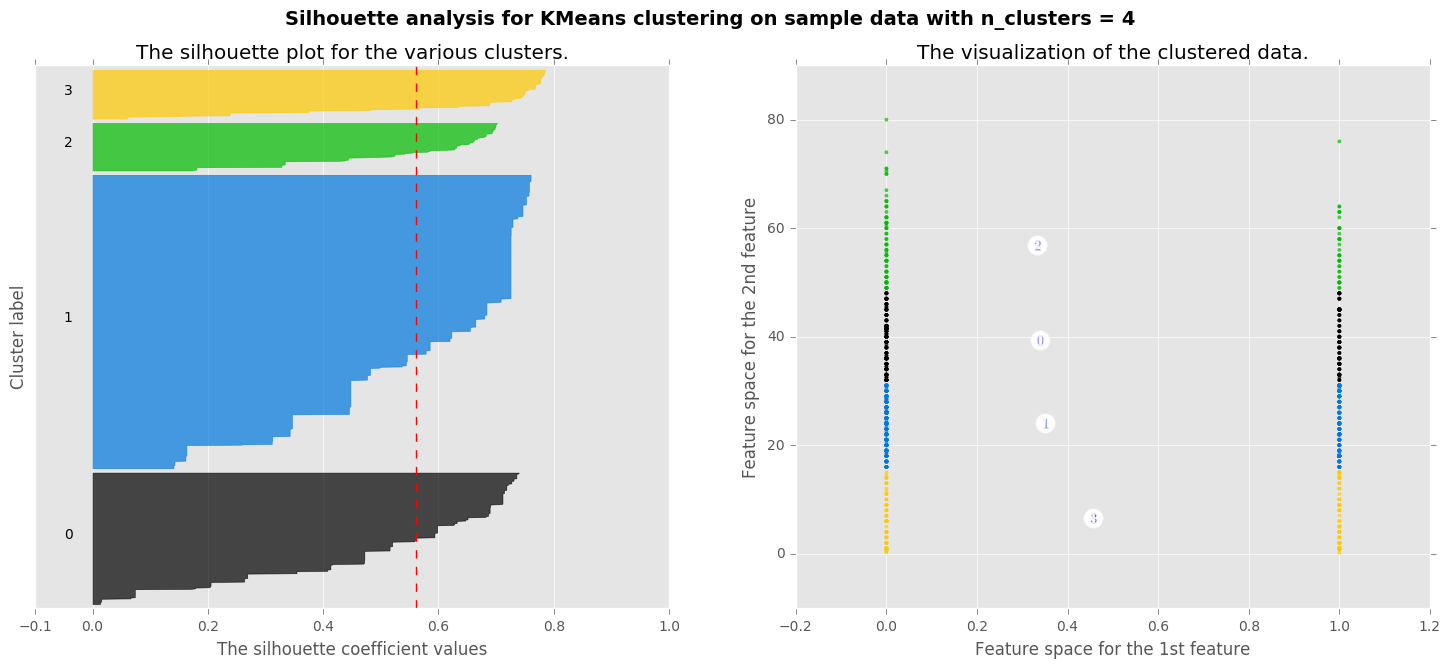

('For n_clusters =', 5, 'The average silhouette_score is :', 0.57679074040542633)


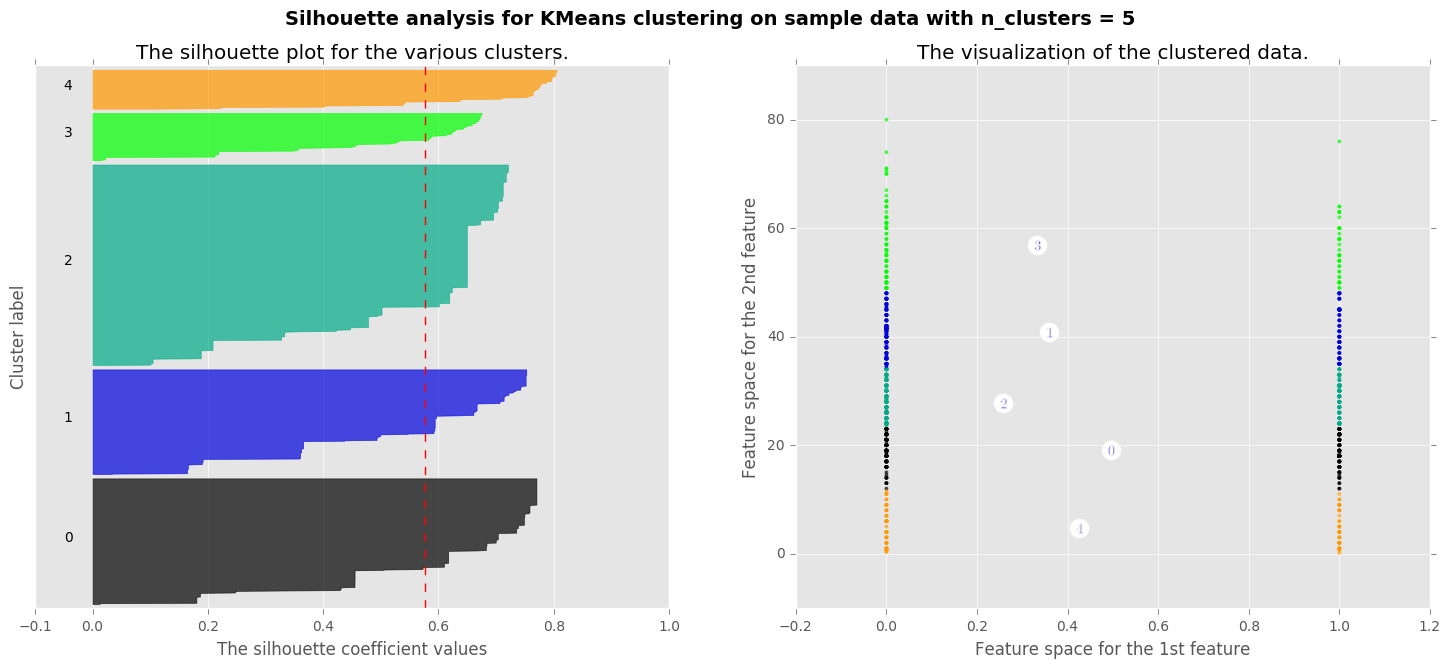

('For n_clusters =', 6, 'The average silhouette_score is :', 0.56871829871722168)


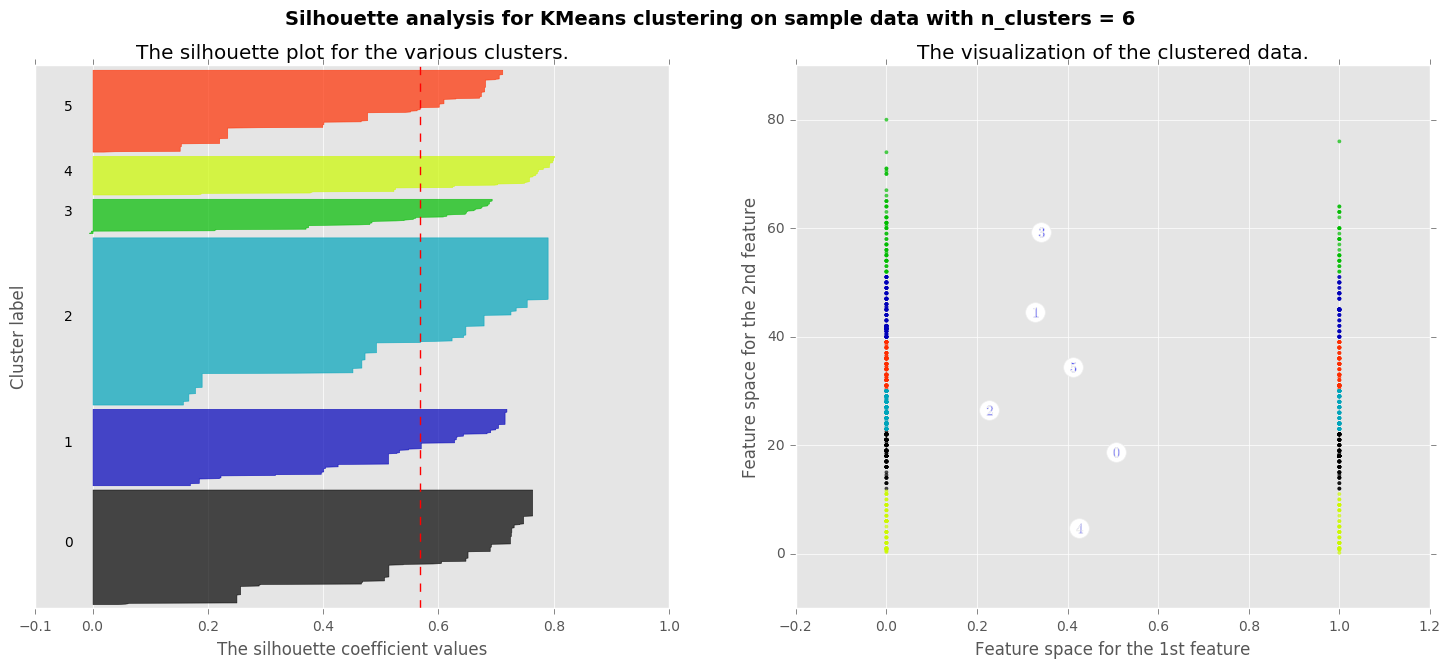

('For n_clusters =', 7, 'The average silhouette_score is :', 0.58007549498752842)


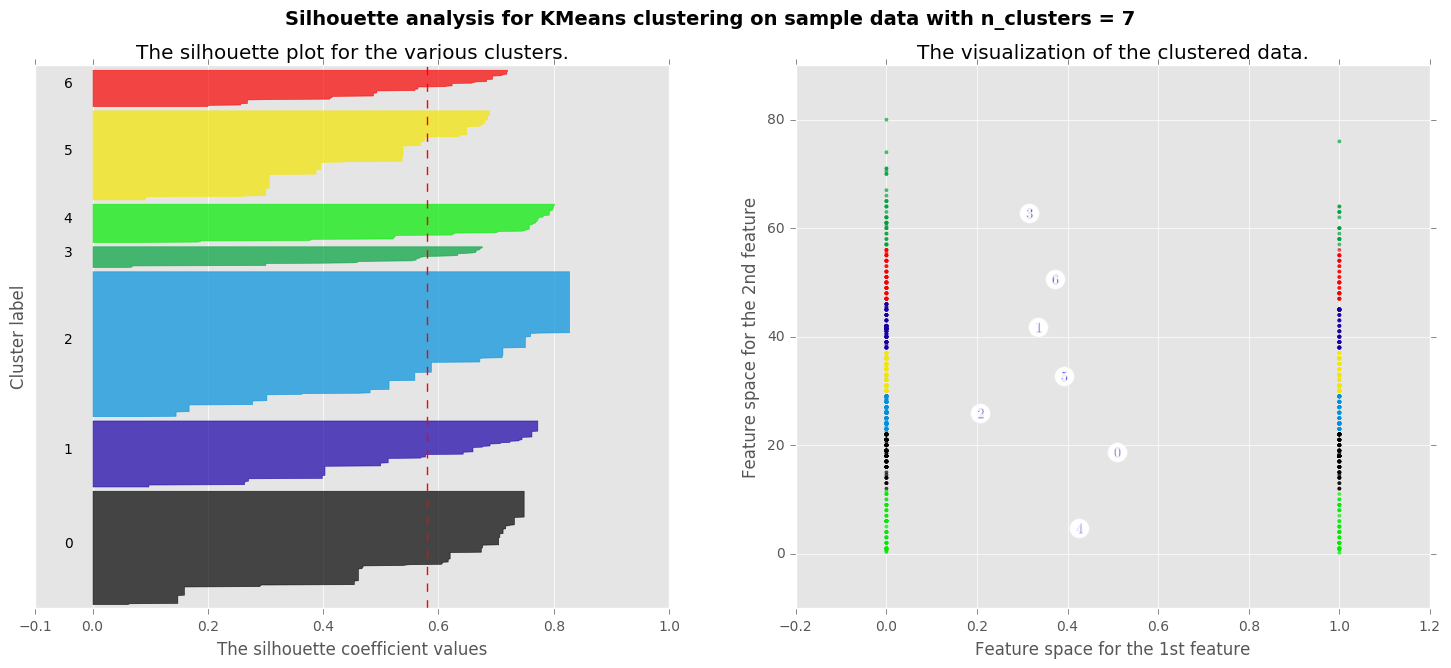

('For n_clusters =', 8, 'The average silhouette_score is :', 0.57237965157270554)


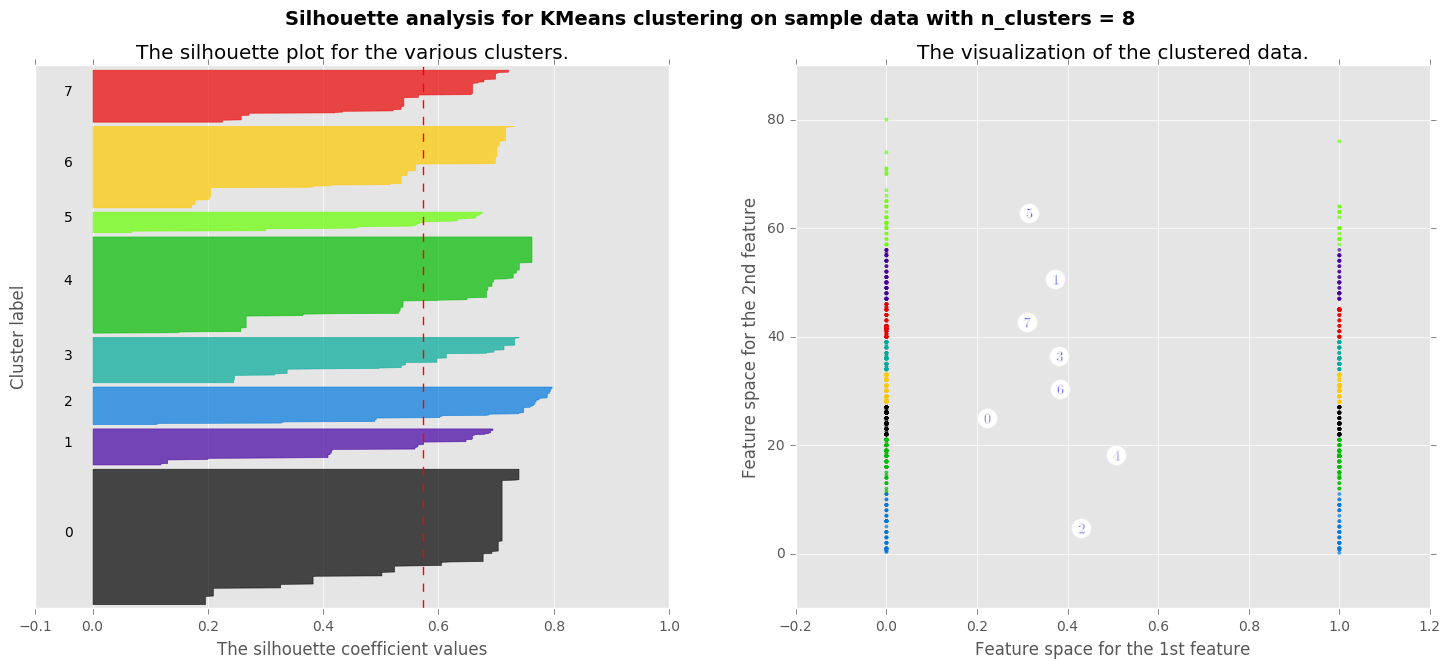

('For n_clusters =', 9, 'The average silhouette_score is :', 0.55577684463114652)


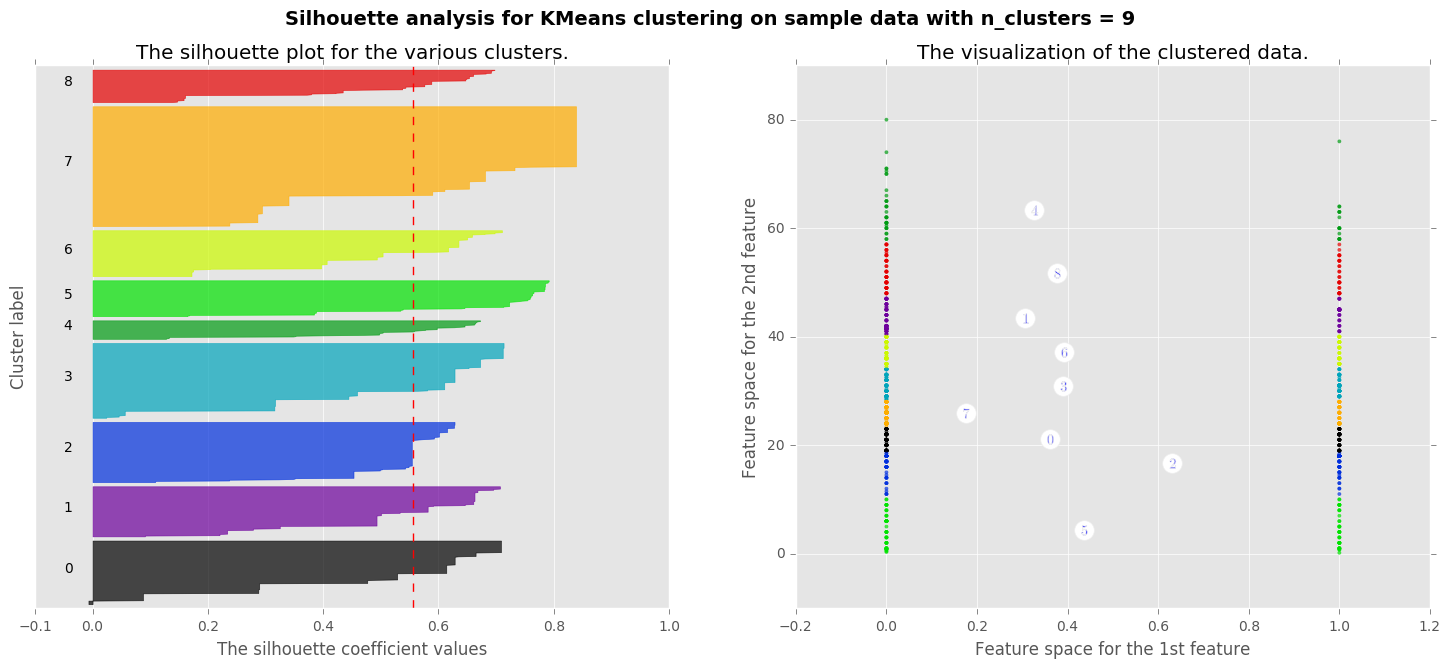

In [34]:
# Clustering Sex dan Age
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

# Inisialisais variable clustering
X = combined[["Sex", "Age"]]
#X = X.reshape(-1, 1)

# Range banyaknya cluster
range_n_clusters = [a for a in range(2, 10)]

for n_clusters in range_n_clusters:
    # Membuat subplot terdiri dari 1 row dan 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X["Sex"], X["Age"], marker='.', s=30, lw=0, alpha=0.7,
                c=colors)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1],
                marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

Berdasarkan average silhouette score, cluster = 2 adalah yang terbaik.

Maka dilakukan clustering dan disimpan pada variabel baru, AgeSex.

In [35]:
clusterer = KMeans(n_clusters=2, random_state=10)
cluster_labels = clusterer.fit_predict(X)

combined['AgeSex'] = cluster_labels

In [36]:
combined.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,NameLength,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Embarked_C,Embarked_Q,Embarked_S,FamilySize,AgeSex
0,1,3,0,22.0,1,0,7.2500,23,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2,0
1,2,1,1,38.0,1,0,71.2833,51,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2,1
2,3,3,1,26.0,0,0,7.9250,22,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0
3,4,1,1,35.0,1,0,53.1000,44,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2,1
4,5,3,0,35.0,0,0,8.0500,24,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1


### Normalisasi Fitur

Fitur yang didapat sejauh ini berada pada range interval yang berbeda. Oleh karena itu perlu dilakukan normalisasi.

In [37]:
features = list(combined.columns)
features.remove('PassengerId')
combined[features] = combined[features].apply(lambda x: x/x.max(), axis=0)

In [38]:
combined.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,NameLength,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Embarked_C,Embarked_Q,Embarked_S,FamilySize,AgeSex
0,1,1.000000,0.0,0.2750,0.125,0.0,0.014151,0.280488,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.181818,0.0
1,2,0.333333,1.0,0.4750,0.125,0.0,0.139136,0.621951,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.181818,1.0
2,3,1.000000,1.0,0.3250,0.000,0.0,0.015469,0.268293,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.090909,0.0
3,4,0.333333,1.0,0.4375,0.125,0.0,0.103644,0.536585,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.181818,1.0
4,5,1.000000,0.0,0.4375,0.000,0.0,0.015713,0.292683,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.090909,1.0


# #3 - Pembangunan Model

Pada tahap ini akan dilakukan pembangunan model. Untuk itu perlu dilakukan pemisahan data training dan testing. Pada kompetisi Titanic di Kaggle, RandomForest terbukti efektif pada kasus ini, sehingga di sini akan menggunakan RandomForest.

Import beberapa library yang diperlukan.

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedShuffleSplit, StratifiedKFold
from matplotlib.colors import Normalize

Memecah combined data set menjadi train dan test set

In [40]:
train0 = pd.read_csv('Data/train.csv')

targets = train0.Survived
train = combined.ix[0:890]
test = combined.ix[891:]

In [41]:
train.shape

(891, 19)

In [42]:
test.shape

(418, 19)

### Feature selection

Terdapat 19 fitur hasil dari feature engineering. Jumlah ini cukup banyak. Fitur tersebut harus dipilih yang mana saja yang merupakan fitur penting.

Tree-based estimators dapat digunakan untuk menghitung tingakat kepentingan suatu fitur.

In [43]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
clf = ExtraTreesClassifier(n_estimators=100)
clf = clf.fit(train, targets)

In [44]:
# Melihat tingkat importance fitur
fitur = pd.DataFrame()
fitur['Fitur'] = train.columns
fitur['Importance'] = clf.feature_importances_

In [45]:
fitur.sort(['Importance'], ascending=False)

,Fitur,Importance
7,NameLength,0.117408
10,Title_Mr,0.116524
6,Fare,0.114858
2,Sex,0.114632
0,PassengerId,0.112184
3,Age,0.101037
1,Pclass,0.086477
9,Title_Miss,0.041525
17,FamilySize,0.040742
4,SibSp,0.035566


Transform train set dan test set agar memiliki fitur2 penting saja.

In [46]:
model = SelectFromModel(clf, prefit=True)
train_new = model.transform(train)
train_new.shape

(891, 7)

In [47]:
test_new = model.transform(test)
test_new.shape

(418, 7)

Terdapat 7 fitur penting.

### Tuning Hyperparmeters

Mencari hyperpatameter terbaik untuk classifier random forest. Metode yang digunakan adalah grid search cross validation.

In [48]:
forest = RandomForestClassifier(max_features='sqrt')

parameter_grid = {
                 'max_depth' : [4, 6, 8],
                 'n_estimators': [100, 200, 300],
                 'criterion': ['gini','entropy']
                 }

cv = StratifiedShuffleSplit(n_splits=5,
                            test_size=0.1, random_state=42)

grid_search = GridSearchCV(forest,
                           param_grid=parameter_grid,
                           cv=cv)

grid_search.fit(train_new, targets)

print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.795555555556
Best parameters: {'n_estimators': 300, 'criterion': 'entropy', 'max_depth': 8}


Best score: 0.8
Best parameters: {'min_samples_split': 11, 'min_samples_leaf': 1}


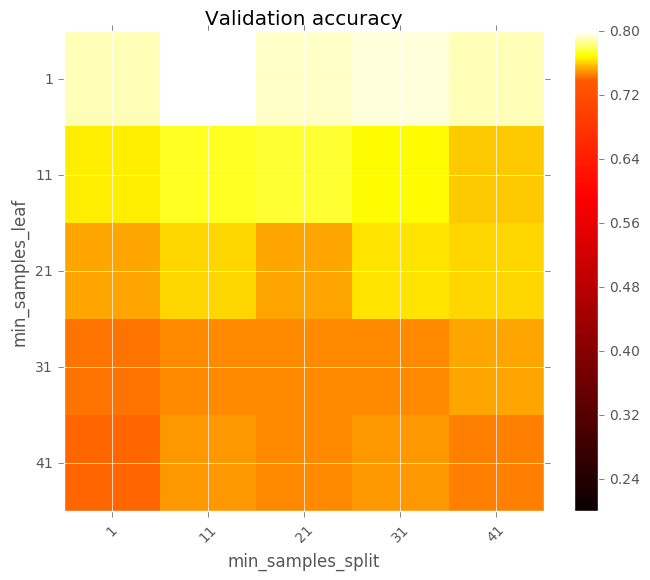

In [50]:
forest = RandomForestClassifier(n_estimators=300, max_features='sqrt',
                                max_depth=8, criterion='entropy')

samples_split= [x for x in range(1, 51, 10)]
samples_leaf= [x for x in range(1, 51, 10)]

parameter_grid = dict(min_samples_split = samples_split, min_samples_leaf = samples_leaf)
cv = StratifiedShuffleSplit(n_splits=5,
                            test_size=0.1, random_state=42)

grid_search = GridSearchCV(forest,
                           param_grid=parameter_grid,
                           cv=cv)

grid_search.fit(train_new, targets)

print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))


class MidpointNormalize(Normalize):

    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))
    
scores = grid_search.cv_results_['mean_test_score'].reshape(len(samples_split),
                                                     len(samples_leaf))

plt.figure(figsize=(8, 6))
plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(scores, interpolation='nearest', cmap=plt.cm.hot,
           norm=MidpointNormalize(vmin=0.2, midpoint=0.74))
plt.xlabel('min_samples_split')
plt.ylabel('min_samples_leaf')
plt.colorbar()
plt.xticks(np.arange(len(samples_split)), samples_split, rotation=45)
plt.yticks(np.arange(len(samples_leaf)), samples_leaf)
plt.title('Validation accuracy')
plt.show()

Dengan optimasi hyperparameter yang cukup minimum, didapatkan score 0.8.
Selanjutnya mempersiapkan file untuk submission kaggle.

In [51]:
output = grid_search.predict(test_new).astype(int)
df_output = pd.DataFrame()
df_output['PassengerId'] = test['PassengerId']
df_output['Survived'] = output
df_output[['PassengerId','Survived']].to_csv('Result/titanic.csv',index=False)